In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from minisom import MiniSom


In [76]:
# Load the dataset
data = pd.read_csv('Customers_data_unsupervised.csv')

# Display basic information about the dataset
print(data.info())
data = data.drop(columns=['RowNumber'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
data

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88
1,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63
4,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64
9996,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77
9997,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58
9998,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
# Check for Missing Values # no missings 
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64


In [7]:
# Check duplicates # no duplicates
data.duplicated().sum()

0

In [77]:
# seperate numeric and categorical variables from the explanatroy variables 
categ = data[['Surname', 'Gender']]
numeric = data.drop(columns=['Surname', 'Gender'])


In [6]:
categ

,Surname,Gender
0,Hargrave,Female
1,Hill,Female
2,Onio,Female
3,Boni,Female
4,Mitchell,Female
...,...,...
9995,Obijiaku,Male
9996,Johnstone,Male
9997,Liu,Female
9998,Sabbatini,Male


In [9]:
numeric

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,42,2,0.00,1,1,1,101348.88
1,15647311,608,41,1,83807.86,1,0,1,112542.58
2,15619304,502,42,8,159660.80,3,1,0,113931.57
3,15701354,699,39,1,0.00,2,0,0,93826.63
4,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64
9996,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,36,7,0.00,1,0,1,42085.58
9998,15682355,772,42,3,75075.31,2,1,0,92888.52


In [78]:
# pre-process the data 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Apply OneHotEncoder to 'categ'
encoder = OneHotEncoder()
categ_encoded = encoder.fit_transform(categ)

# Convert the sparse matrix to a DataFrame
categ_preprocessed_df = pd.DataFrame(categ_encoded.toarray(), columns=encoder.get_feature_names_out(categ.columns))

# Apply RobustScaler to 'numeric'
scaler = RobustScaler()
numeric_preprocessed = scaler.fit_transform(numeric)

# Convert the scaled array to a DataFrame
numeric_preprocessed_df = pd.DataFrame(numeric_preprocessed, columns=numeric.columns)

# Concatenate preprocessed categorical and numeric variables
data_preprocessed = pd.concat([numeric_preprocessed_df,categ_preprocessed_df], axis=1)


In [11]:
data_preprocessed

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abazu,...,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Gender_Female,Gender_Male
0,-0.450149,-0.246269,0.416667,-0.75,-0.761480,0.0,0.0,0.0,0.011739,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.348236,-0.328358,0.333333,-1.00,-0.104906,0.0,-1.0,0.0,0.125512,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.572822,-1.119403,0.416667,0.75,0.489346,2.0,0.0,-1.0,0.139630,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.085129,0.350746,0.166667,-1.00,-0.761480,1.0,-1.0,-1.0,-0.064717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.378091,1.477612,0.500000,-0.75,0.221806,0.0,0.0,0.0,-0.214561,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.677669,0.888060,0.166667,0.00,-0.761480,1.0,0.0,-1.0,-0.039876,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,-0.969051,-1.014925,-0.166667,1.25,-0.312031,0.0,0.0,0.0,0.015306,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,-0.851654,0.425373,-0.083333,0.50,-0.761480,0.0,-1.0,0.0,-0.590615,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,-0.067222,0.895522,0.416667,-0.50,-0.173319,1.0,0.0,-1.0,-0.074252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
# Checking for the outliers in the data 

# Calculate quartiles
Q1 = numeric_preprocessed_df.quantile(0.25)
Q3 = numeric_preprocessed_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers
outliers = (numeric_preprocessed_df < lower_fence) | (numeric_preprocessed_df > upper_fence)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers.sum())

# since the outliers represent about 4.34% of the whole data, they can be neglected

Number of outliers for each feature:
CustomerId           0
CreditScore         15
Age                359
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
dtype: int64


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


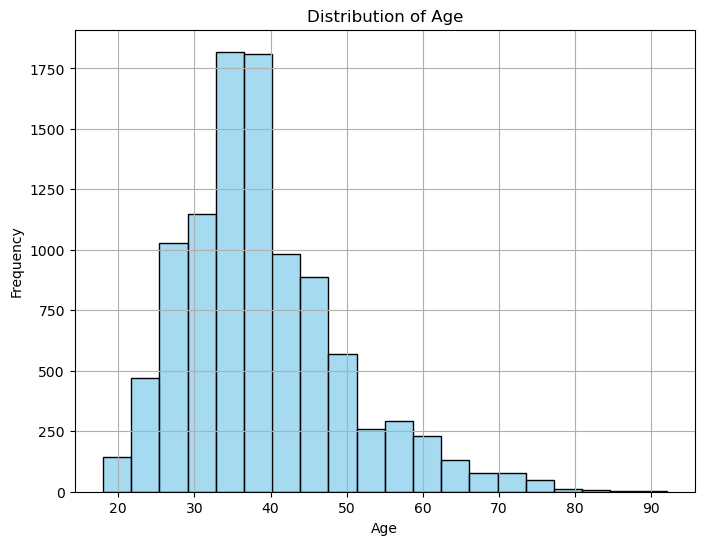

In [13]:
# Checking distribution of age since it has about 359 outliers which is a very small percentage of the training data so it can be neglected 
import seaborn as sns

# Plot histogram of Age using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# The distribution of the age is almost normal with no significant outliers 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

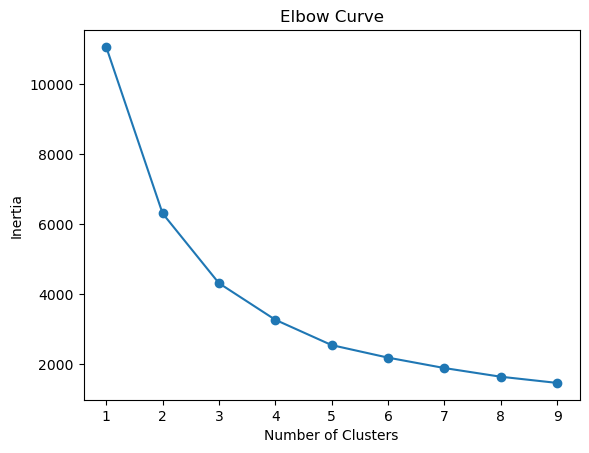

In [79]:
# Applying kmeans clustering based on Age and Estimated Salary 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimise_k_means(data_preprocessed, max_k):
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data_preprocessed)
        inertias.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_k), inertias, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Example usage
optimise_k_means(data_preprocessed[["Age","EstimatedSalary"]], 10)


In [53]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_preprocessed[["Age","EstimatedSalary"]])
data_preprocessed["kmeans_2"]=kmeans.labels_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-2.47861227e-01, -1.75762638e-03],
       [ 1.32322552e+00,  9.52689363e-04]])

In [55]:
# Count the number of observations in each cluster
cluster_counts = data_preprocessed["kmeans_2"].value_counts().sort_index()
print(cluster_counts) 

kmeans_2
0    7403
1    2597
Name: count, dtype: int64


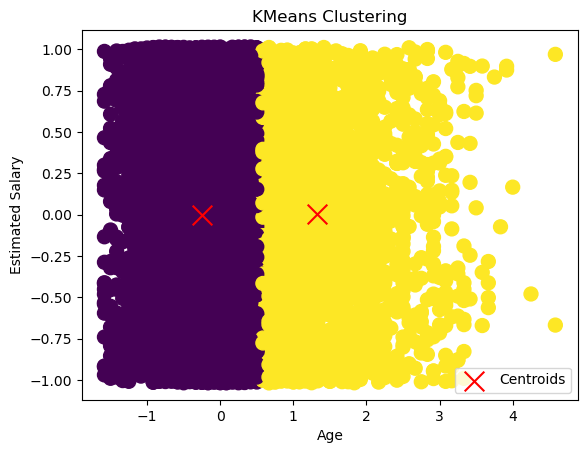

In [51]:
# Plot the data points and the cluster centers
plt.scatter(x=data_preprocessed["Age"], y=data_preprocessed["EstimatedSalary"], c=data_preprocessed["kmeans_2"], cmap='viridis', marker='o', s=100)
plt.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

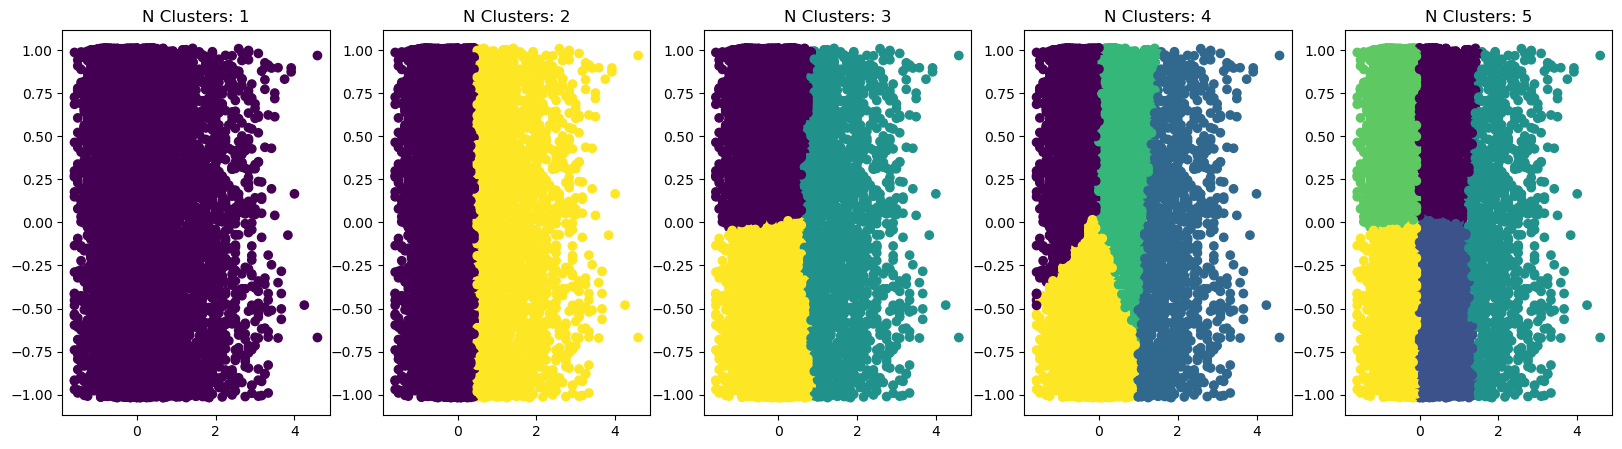

In [19]:
#Create Multiple Clusters
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data_preprocessed[["Age","EstimatedSalary"]])
    data_preprocessed[f"KMeans_{k}"]=kmeans.labels_
# To compare between fitting with different no of clusters (k)
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i, ax in enumerate(axs, start=1):
    ax.scatter(x=data_preprocessed["Age"], y=data_preprocessed["EstimatedSalary"], c=data_preprocessed[f"KMeans_{i}"])
    ax.set_title(f"N Clusters: {i}")

plt.show()


In [80]:
# Evaluate the KMeans clustering results
X = data_preprocessed[['EstimatedSalary', 'Age']].values
kmeans_labels = kmeans.fit_predict(X)
data_preprocessed['kmeans_labels'] = kmeans_labels

# Evaluate the KMeans clustering results
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)
kmeans_davies_bouldin_score = davies_bouldin_score(X, kmeans_labels)
kmeans_calinski_harabasz_score = calinski_harabasz_score(X, kmeans_labels)

print(f'KMeans Clustering on EstimatedSalary and Age:')
print(f'Silhouette Score: {kmeans_silhouette_score}')
print(f'Davies-Bouldin Index: {kmeans_davies_bouldin_score}')
print(f'Calinski-Harabasz Index: {kmeans_calinski_harabasz_score}\n')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Clustering on EstimatedSalary and Age:
Silhouette Score: 0.3416183114920339
Davies-Bouldin Index: 0.8115728022468135
Calinski-Harabasz Index: 8149.400518818051



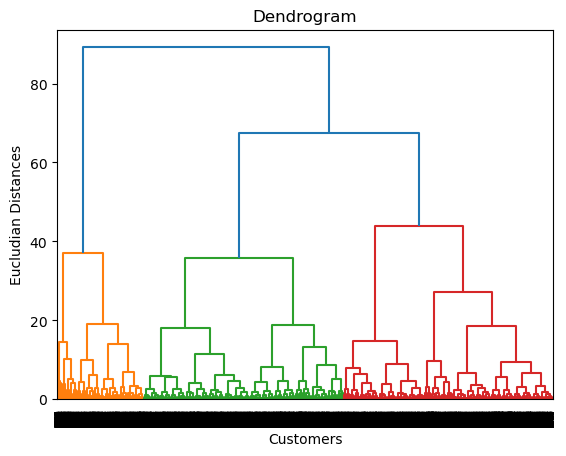

In [56]:
#Apply Hierarchical  clustering on Age and Estimated Salary
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

X = data_preprocessed.loc[:, ['Age', 'EstimatedSalary']]

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucludian Distances')
plt.show()

In [57]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage

# Define the desired number of clusters
num_clusters = 6

# Perform hierarchical clustering to obtain the linkage matrix
linked = linkage(data_preprocessed, method='ward')

# Cut the dendrogram to obtain cluster labels
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Print the cluster labels
print(cluster_labels)


[3 3 4 ... 4 6 3]


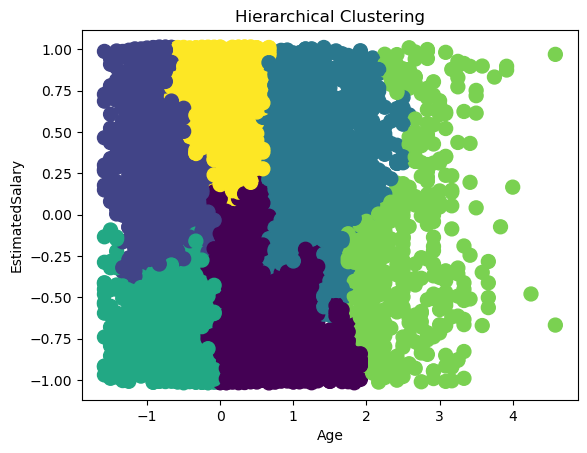

In [58]:
#Apply Hierarchical  clustering on Age and Estimated Salary with n=6
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def hierarchical_clustering(data_preprocessed, num_clusters):
    # Performing hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(data_preprocessed)
    
    # Plotting the clusters
    plt.scatter(x=data_preprocessed["Age"], y=data_preprocessed["EstimatedSalary"], c=clustering.labels_, cmap='viridis', marker='o', s=100)
    plt.xlabel('Age')
    plt.ylabel('EstimatedSalary')
    plt.title('Hierarchical Clustering')
    plt.show()
 

# Example usage
hierarchical_clustering(data_preprocessed[["Age","EstimatedSalary"]], num_clusters=6)

In [85]:
# Evaluate the Hierarchical clustering results
X = data_preprocessed[['EstimatedSalary', 'Age']].values

hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')


hc_labels = hc.fit_predict(X)
data_preprocessed['hc_labels'] = hc_labels

hc_silhouette_score = silhouette_score(X, hc_labels)
hc_davies_bouldin_score = davies_bouldin_score(X, hc_labels)
hc_calinski_harabasz_score = calinski_harabasz_score(X, hc_labels)

print(f'Hierarchical Clustering on EstimatedSalary and Age:')
print(f'Silhouette Score: {hc_silhouette_score}')
print(f'Davies-Bouldin Index: {hc_davies_bouldin_score}')
print(f'Calinski-Harabasz Index: {hc_calinski_harabasz_score}')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Clustering on EstimatedSalary and Age:
Silhouette Score: 0.2985040971743838
Davies-Bouldin Index: 0.9306098195905311
Calinski-Harabasz Index: 6733.001341652342


In [86]:
# Print the comparison of the clustering evaluation metrics
print("Comparison of Clustering Methods on EstimatedSalary and Age:")
print(f"KMeans Silhouette Score: {kmeans_silhouette_score}")
print(f"Hierarchical Silhouette Score: {hc_silhouette_score}\n")

print(f"KMeans Davies-Bouldin Index: {kmeans_davies_bouldin_score}")
print(f"Hierarchical Davies-Bouldin Index: {hc_davies_bouldin_score}\n")

print(f"KMeans Calinski-Harabasz Index: {kmeans_calinski_harabasz_score}")
print(f"Hierarchical Calinski-Harabasz Index: {hc_calinski_harabasz_score}")


Comparison of Clustering Methods on EstimatedSalary and Age:
KMeans Silhouette Score: 0.39597631588078486
Hierarchical Silhouette Score: 0.2985040971743838

KMeans Davies-Bouldin Index: 0.7806603372990903
Hierarchical Davies-Bouldin Index: 0.9306098195905311

KMeans Calinski-Harabasz Index: 11480.106143288225
Hierarchical Calinski-Harabasz Index: 6733.001341652342


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

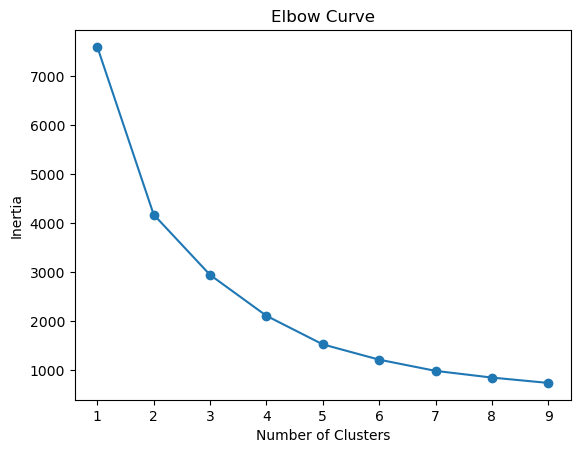

In [36]:
# Applying kmeans clustering based on Balance and Creditscore 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimise_k_means(data_preprocessed, max_k):
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data_preprocessed)
        inertias.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_k), inertias, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Example usage
optimise_k_means(data_preprocessed[["Balance","CreditScore"]], 10)

In [37]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_preprocessed[["Balance","CreditScore"]])
data_preprocessed["kmeans1_2"]=kmeans.labels_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers


array([[-0.1547256 ,  0.55600923],
       [-0.17029741, -0.61448692]])

In [39]:
# Count the number of observations in each cluster
cluster_counts = data_preprocessed["kmeans1_2"].value_counts().sort_index()
print(cluster_counts) 


kmeans1_2
0    5153
1    4847
Name: count, dtype: int64


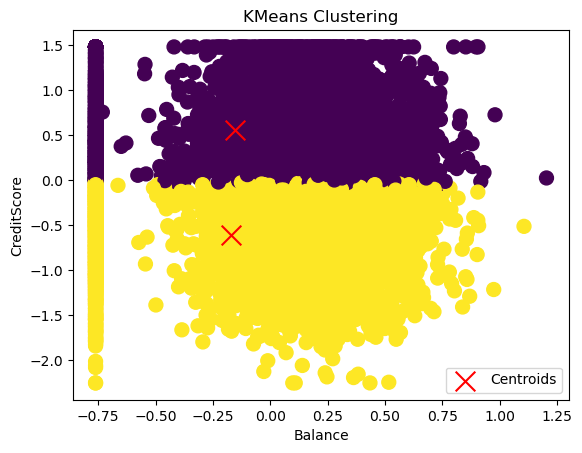

In [40]:
# Plot the data points and the cluster centers
plt.scatter(x=data_preprocessed["Balance"], y=data_preprocessed["CreditScore"], c=data_preprocessed["kmeans1_2"], cmap='viridis', marker='o', s=100)
plt.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Balance')
plt.ylabel('CreditScore')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [88]:
# Evaluate the KMeans clustering results
X1 = data_preprocessed[['Balance', 'CreditScore']].values
kmeans_labels1 = kmeans.fit_predict(X1)
data_preprocessed['kmeans_labels1'] = kmeans_labels1

# Evaluate the KMeans clustering results
kmeans_silhouette_score = silhouette_score(X1, kmeans_labels1)
kmeans_davies_bouldin_score = davies_bouldin_score(X1, kmeans_labels1)
kmeans_calinski_harabasz_score = calinski_harabasz_score(X1, kmeans_labels1)

print(f'KMeans Clustering on Balance and CreditScore:')
print(f'Silhouette Score: {kmeans_silhouette_score}')
print(f'Davies-Bouldin Index: {kmeans_davies_bouldin_score}')
print(f'Calinski-Harabasz Index: {kmeans_calinski_harabasz_score}\n')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Clustering on Balance and CreditScore:
Silhouette Score: 0.39597631588078486
Davies-Bouldin Index: 0.7806603372990903
Calinski-Harabasz Index: 11480.106143288225



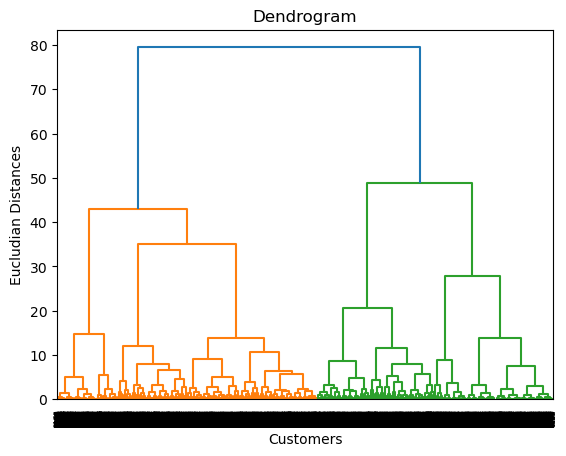

In [89]:
#Apply Hierarchical  clustering on Balance and CreditScore
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

X = data_preprocessed.loc[:, ['Balance', 'CreditScore']]

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucludian Distances')
plt.show()

In [90]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage

# Define the desired number of clusters
num_clusters = 5

# Perform hierarchical clustering to obtain the linkage matrix
linked = linkage(data_preprocessed, method='ward')

# Cut the dendrogram to obtain cluster labels
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Print the cluster labels
print(cluster_labels)


[1 2 5 ... 5 3 5]


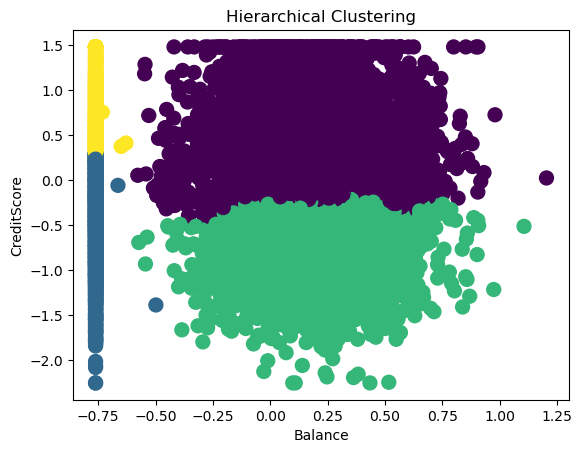

In [26]:
#Apply Hierarchical  clustering on Balance and CreditScore Salary
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def hierarchical_clustering(data_preprocessed, num_clusters):
    # Performing hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(data_preprocessed)
    
    # Plotting the clusters
    plt.scatter(x=data_preprocessed["Balance"], y=data_preprocessed["CreditScore"], c=clustering.labels_, cmap='viridis', marker='o', s=100)
    plt.xlabel('Balance')
    plt.ylabel('CreditScore')
    plt.title('Hierarchical Clustering')
    plt.show()
 

# Example usage
hierarchical_clustering(data_preprocessed[["Balance","CreditScore"]], num_clusters=5)

In [91]:
# Evaluate the Hierarchical clustering results
X1 = data_preprocessed[['Balance', 'CreditScore']].values

hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')


hc_labels1 = hc.fit_predict(X1)
data_preprocessed['hc_labels'] = hc_labels1

hc_silhouette_score = silhouette_score(X1, hc_labels1)
hc_davies_bouldin_score = davies_bouldin_score(X1, hc_labels1)
hc_calinski_harabasz_score = calinski_harabasz_score(X1, hc_labels1)

print(f'Hierarchical Clustering on Balance and Credit Score:')
print(f'Silhouette Score: {hc_silhouette_score}')
print(f'Davies-Bouldin Index: {hc_davies_bouldin_score}')
print(f'Calinski-Harabasz Index: {hc_calinski_harabasz_score}')



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Clustering on Balance and Credit Score:
Silhouette Score: 0.4081056194881675
Davies-Bouldin Index: 0.7588702013054593
Calinski-Harabasz Index: 8675.990181514042


In [92]:
# Print the comparison of the clustering evaluation metrics
print("Comparison of Clustering Methods on Balance and Credit Score:")
print(f"KMeans Silhouette Score: {kmeans_silhouette_score}")
print(f"Hierarchical Silhouette Score: {hc_silhouette_score}\n")

print(f"KMeans Davies-Bouldin Index: {kmeans_davies_bouldin_score}")
print(f"Hierarchical Davies-Bouldin Index: {hc_davies_bouldin_score}\n")

print(f"KMeans Calinski-Harabasz Index: {kmeans_calinski_harabasz_score}")
print(f"Hierarchical Calinski-Harabasz Index: {hc_calinski_harabasz_score}")


Comparison of Clustering Methods on Balance and Credit Score:
KMeans Silhouette Score: 0.39597631588078486
Hierarchical Silhouette Score: 0.4081056194881675

KMeans Davies-Bouldin Index: 0.7806603372990903
Hierarchical Davies-Bouldin Index: 0.7588702013054593

KMeans Calinski-Harabasz Index: 11480.106143288225
Hierarchical Calinski-Harabasz Index: 8675.990181514042


In [62]:
# Apply SOM
# Convert preprocessed features to numpy array
x_preprocessed_array = data_preprocessed.to_numpy()

# Initialize and train SOM
som = MiniSom(x=10, y=10, input_len=x_preprocessed_array.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(x_preprocessed_array)
som.train_random(data=x_preprocessed_array, num_iteration=100)

# Map the clusters
mapped = np.array([som.winner(x) for x in x_preprocessed_array])
som_labels = [x[0]*10 + x[1] for x in mapped]

print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T[0]}')

-------------
Distance Map
------------
Shape: (10, 10)
First Line: [0.36576717 0.57364971 0.51738877 0.41742125 0.40161428 0.34700797
 0.41937282 0.48945022 0.52465716 0.37377789]


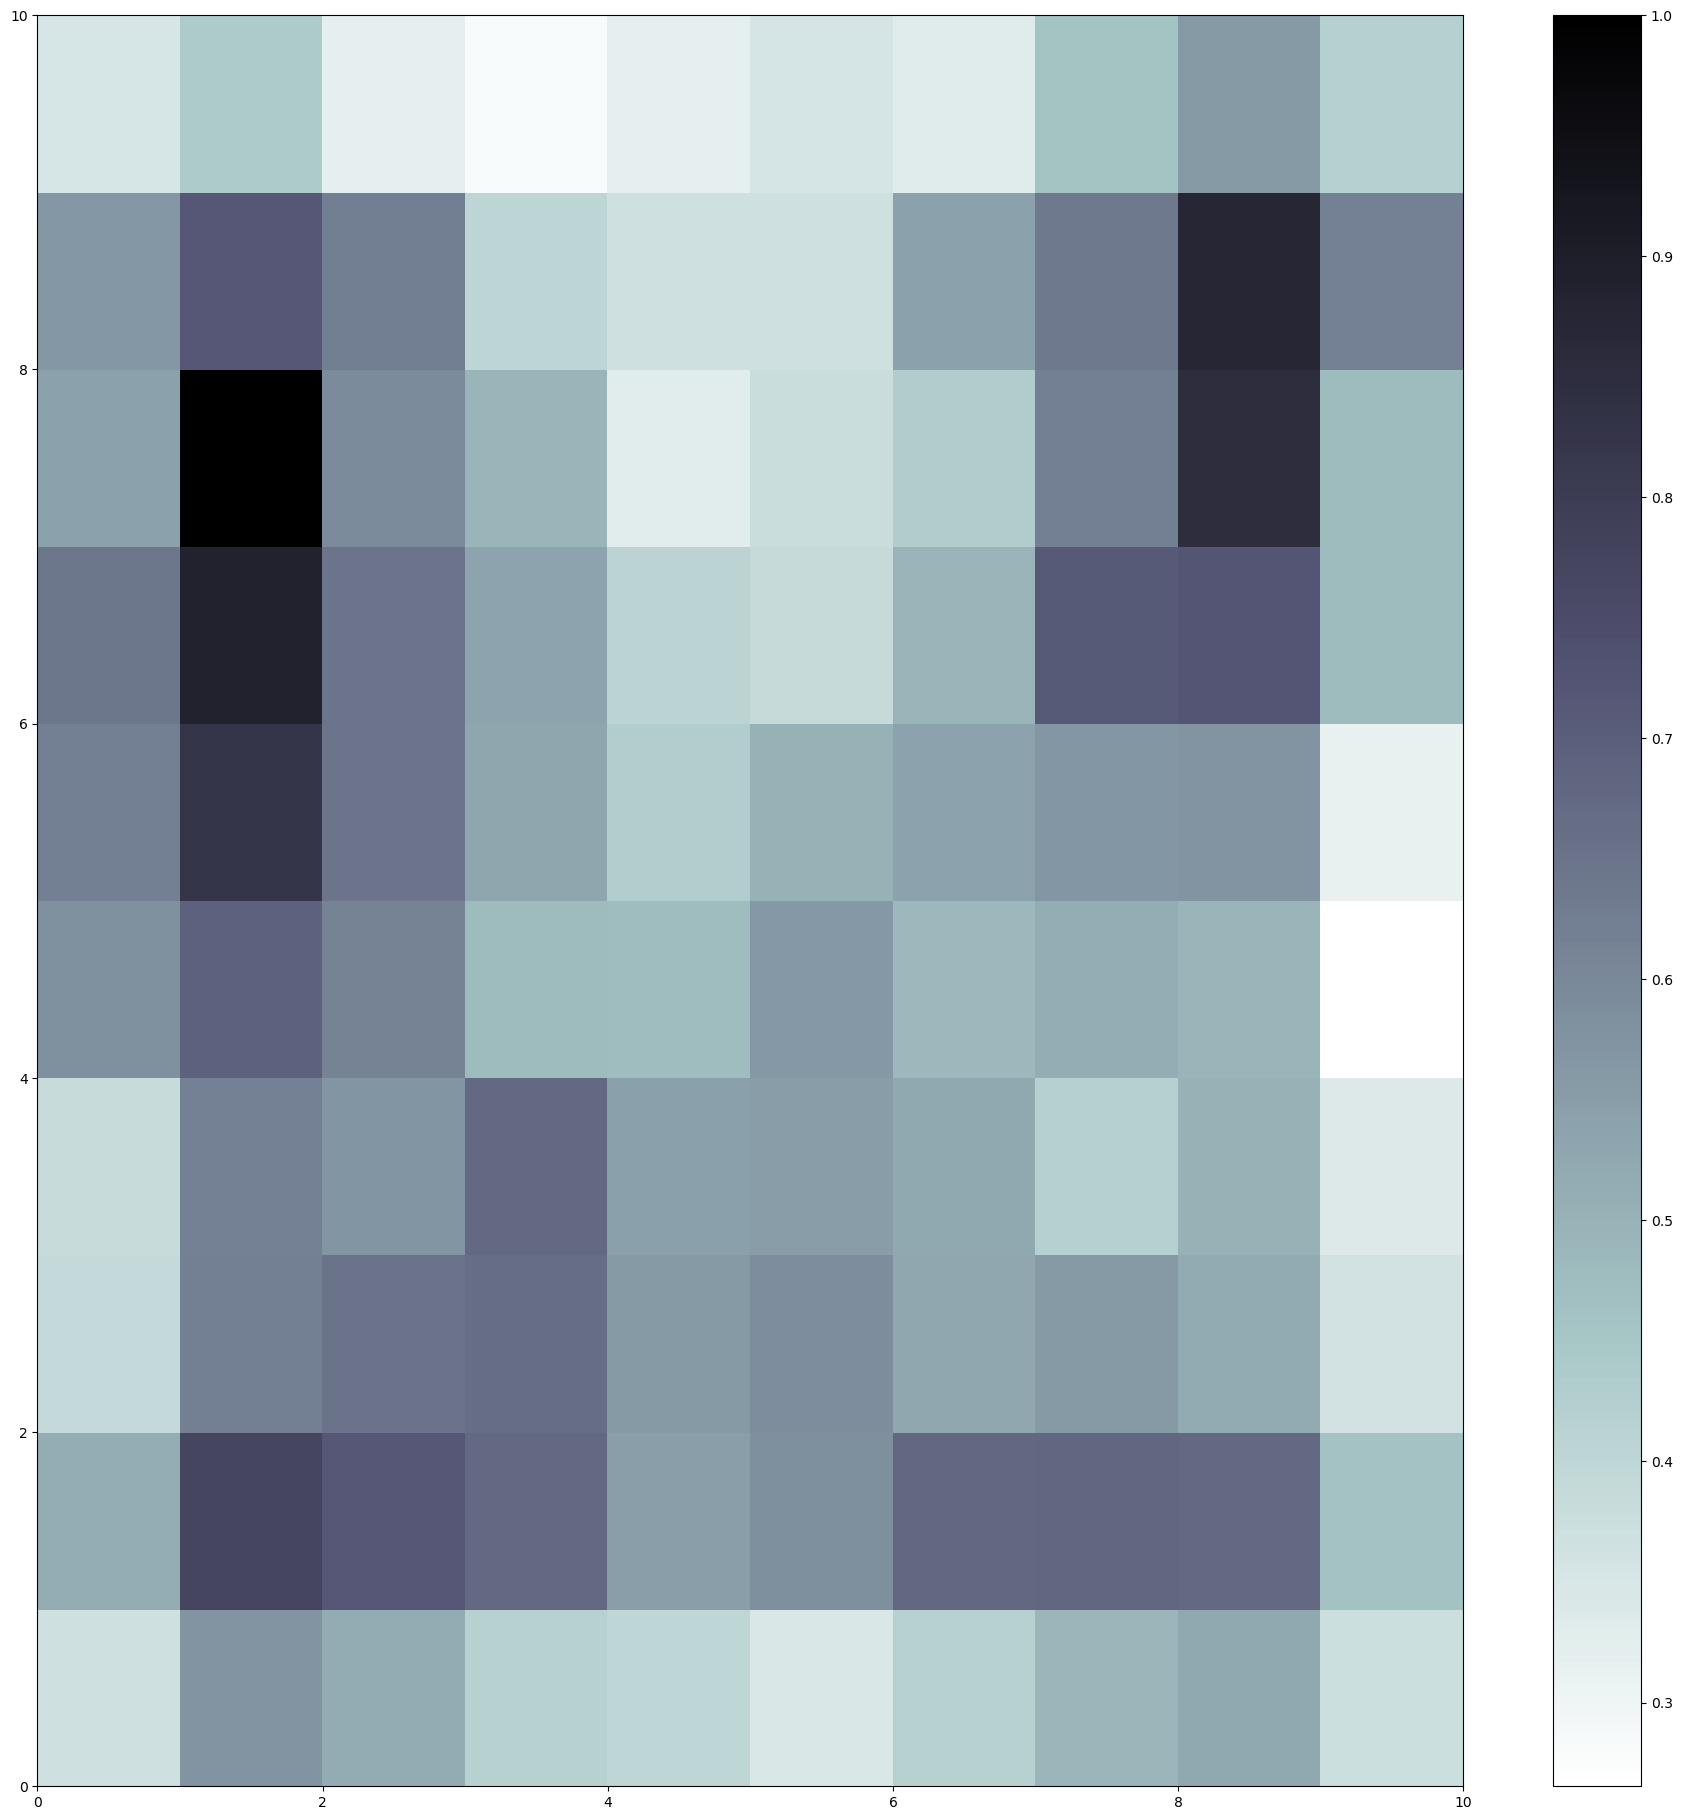

In [64]:
import math
n_features = data_preprocessed.shape[1]
n_samples = data_preprocessed.shape[0]

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))

plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

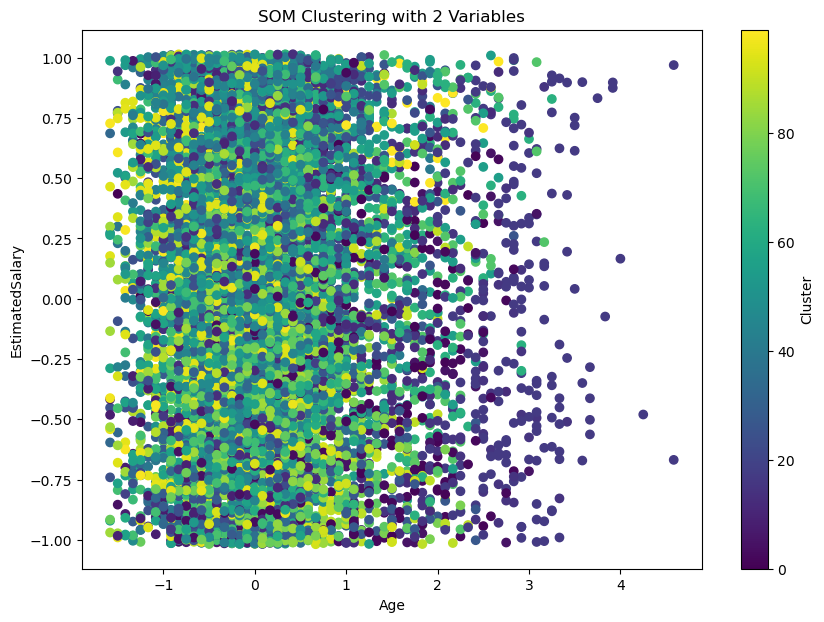

In [74]:
# Assign a unique color to each cluster
unique_clusters = np.unique(mapped, axis=0)
cluster_colors = {tuple(node): i for i, node in enumerate(unique_clusters)}

# Assign a color to each data point based on its winning node
data_colors = [cluster_colors[tuple(node)] for node in mapped]

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(data_preprocessed["Age"], data_preprocessed["EstimatedSalary"], c=data_colors, cmap='viridis')
plt.title('SOM Clustering with 2 Variables')
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.colorbar(label='Cluster')
plt.show()

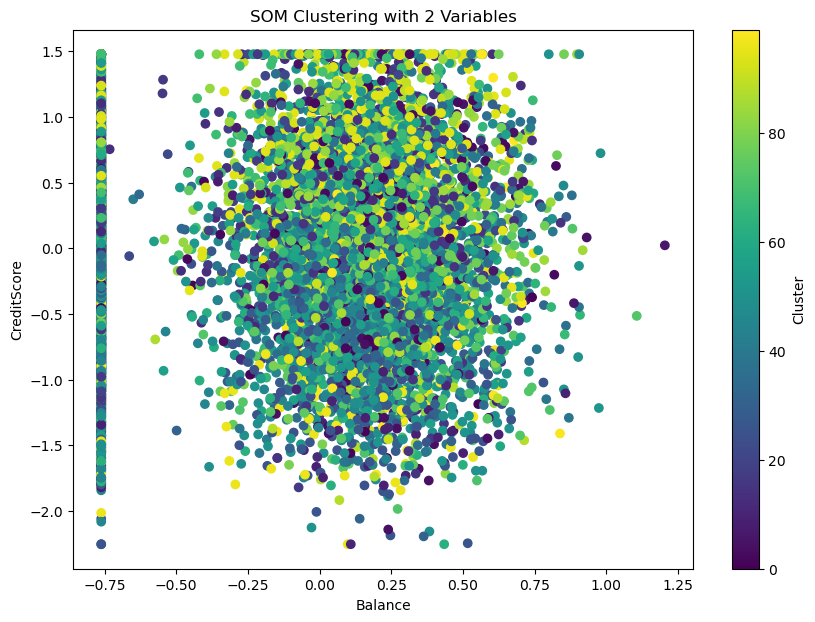

In [93]:
# Assign a unique color to each cluster
unique_clusters1 = np.unique(mapped, axis=0)
cluster_colors = {tuple(node): i for i, node in enumerate(unique_clusters1)}

# Assign a color to each data point based on its winning node
data_colors = [cluster_colors[tuple(node)] for node in mapped]

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(data_preprocessed["Balance"], data_preprocessed["CreditScore"], c=data_colors, cmap='viridis')
plt.title('SOM Clustering with 2 Variables')
plt.xlabel("Balance")
plt.ylabel("CreditScore")
plt.colorbar(label='Cluster')
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

#Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x_preprocessed_array)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_preprocessed_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

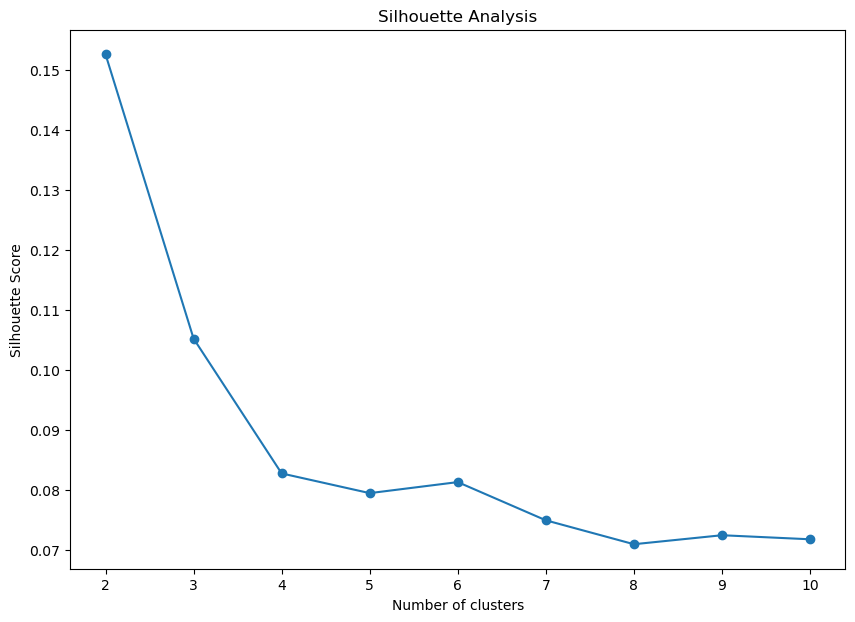

In [70]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [95]:
#Evaluating the SOM 
#Quantization Error
quantization_error_som = som.quantization_error(x_preprocessed_array)
print(f'SOM Quantization Error: {quantization_error_som}')

# Topographic Error
topographic_error_som = som.topographic_error(x_preprocessed_array)
print(f'SOM Topographic Error: {topographic_error_som}')
# Silhouette Score
silhouette_avg_som = silhouette_score(x_preprocessed_array, som_labels)
print(f'SOM Silhouette Score: {silhouette_avg_som}')


SOM Quantization Error: 1.763774705658362
SOM Topographic Error: 0.798
SOM Silhouette Score: 0.01372243915507369
